In [1]:
# #Import modules

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

## Size distribution

In [2]:
firm_sizes = pd.read_csv('./../data/processed/firm_sizes_99.csv') # Review paths...
buyr_sizes = pd.read_csv('./../data/processed/buyr_sizes_99.csv')

IOError: File ./../data/processed/firm_sizes_99.csv does not exist

In [6]:
from numpy import log10, inf, nan

fs_df = firm_sizes
fs_df['log_VART'] = log10(fs_df['VART'])

for y in fs_df.YEAR.unique():
    fig, axs = plt.subplots(1, 2, figsize = (16, 5))
    for i in [0, 1]:
        fs_df_slice = fs_df.loc[(fs_df.YEAR >= y) & (fs_df.IMPORT == i)].replace(-inf, nan).dropna()
        fs_df_slice['bin'], bins_x = pd.cut(fs_df_slice['log_VART'], 90, retbins=True)

        fs_ct_val = fs_df_slice.groupby('bin').agg({'ID': 'count', 'VART': sum}).rename(columns = {'ID': 'counts', 'VART': 'value'})

        fs_ct_val/=fs_ct_val.sum()
        ax = axs[i]
        fs_ct_val['log_VART'] = (bins_x[:-1] + bins_x[1:])/2.
        fs_ct_val.plot(x = 'log_VART', y = 'counts', ax = ax)
        fs_ct_val.plot(x = 'log_VART', y = 'value', ax = ax)
        ax.set_title('IMPORTS, '+str(y)) if i == 1 else ax.set_title('EXPORTS, '+str(y))
#         ax.set_yscale('log')
        ax.set_ylim(0.0001, 0.06)
    plt.savefig('./../Figures/size_dist_sample.png')

NameError: name 'firm_sizes' is not defined

## Distribution among the top

NameError: name 'log' is not defined

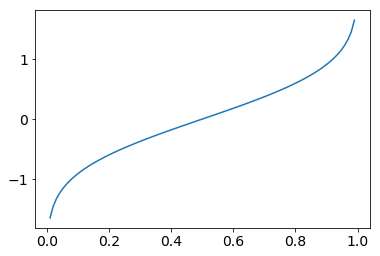

In [7]:
from numpy import log10, round, transpose, linspace
from scipy.special import erfinv, erf

def erfinv_(x):
    return erfinv(2*(x - .5))

def erf_(x):
    return .5*erf(x)+.5



X = linspace(0, 1, 100, endpoint=True)
y = erfinv_(X)
plt.plot(X, y)

plt.plot(X, y + .5*log(10))


plt.axvline(.5*(1-0.68))
plt.axvline(1-.5*(1-0.68))

plt.axhline(1/sqrt(2))
plt.axhline(-1/sqrt(2))

In [8]:
import matplotlib
matplotlib.rcParams.update({'font.size': 14})

### CDF of counts and value

# X = linspace(-3, 3, 100, endpoint=True)

# plt.plot(X, erf_(X))
# plt.plot(X, erf_(X - .5*log(10)))

# print table of values
# round(transpose((erf_(X - .5*log(10)), erf_(X))), 4)

In [ ]:
from numpy import log

In [ ]:
### Cargar firm sizes y listo.

NameError: name 'firm_sizes' is not defined

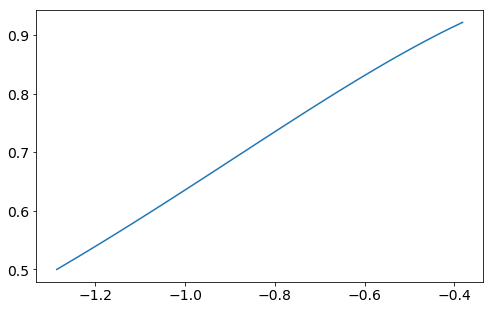

In [11]:
# Top x% of agents is taking y% of the value.
fig, ax = plt.subplots(1, figsize = (8, 5))

#Theoretical
ax.plot(log10(erf_(X - .5*log(10))), (erf_(X)), label = 'log-normal')

#Empirical
fs = firm_sizes.sort_values(by = 'VART', ascending = False).reset_index(drop = True).reset_index()
fs['index'] = log10((fs['index'] + 1)/len(fs))
fs['cum_value'] = ((fs['VART']/fs['VART'].sum()).cumsum())
fs.head(10000).plot.scatter(x = 'index', y = 'cum_value', marker = '.', edgecolor = 'None', label = 'empirical', ax = ax)

# axis settings
ax.set_xlim(-9, 0)
# ax.set_ylim(-3, 0)
ax.set_title('log-normal implication \n for the distribution among the top')
ax.set_xlabel("Top 'x' fraction of agents...")
ax.set_ylabel("... take 'y' of the value")
ax.get_legend().remove()

# plt.savefig('./../Figures/top_lognormal_demo.png')
plt.show()
